In [1]:
import pandas as pd
from konlpy.tag import Hannanum

hannanum=Hannanum()
df=pd.read_csv("d:/learn/data/군집분석데이터.csv",engine="python")
df.head()

C:\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

docs=[]
for i in df["기사내용"]:
    docs.append(hannanum.nouns(i)) #명사 추출

# 빈칸으로 구분된 하나의 list에 넣음
for i in range(len(docs)):
    docs[i]=" ".join(docs[i])

#카운트 벡터    
vec=CountVectorizer()
X=vec.fit_transform(docs)

df2=pd.DataFrame(X.toarray(),columns=vec.get_feature_names())
df2.head()

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


[[ 0.          3.          6.          2.        ]
 [ 1.          4.         10.34408043  2.        ]
 [13.         14.         10.48808848  2.        ]
 [ 2.         15.         11.13552873  3.        ]
 [11.         17.         11.22497216  3.        ]
 [ 5.         18.         11.83215957  4.        ]
 [19.         20.         12.          7.        ]
 [16.         21.         12.32882801  9.        ]
 [ 6.         22.         13.49073756 10.        ]
 [ 7.          8.         14.4222051   2.        ]
 [ 9.         24.         14.73091986  3.        ]
 [12.         23.         15.13274595 11.        ]
 [25.         26.         15.96871942 14.        ]
 [10.         27.         18.60107524 15.        ]]


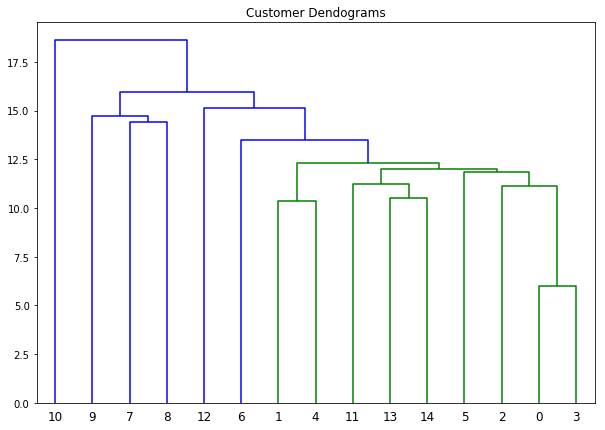

In [5]:
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

#구조적 군집화 객체 - 가장 가까운 객체끼리 묶음
cluster=AgglomerativeClustering(n_clusters=3)
cluster.fit_predict(df2)

plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
result=shc.linkage(df2)
print(result)
#덴드로그램이 출력됨(트리 형식)
dend=shc.dendrogram(result)